## Mask R-CNN - Inspect Weights of a Trained Model

This notebook includes code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [0]:
%cd
!git clone --quiet https://github.com/souvikjana1993/Mask_RCNN.git
%cd ~/Mask_RCNN
!pip install -q PyDrive
!pip install -q -r requirements.txt
!python -q setup.py install
%cd ~/Mask_RCNN
import os
os.makedirs('dataset')
os.chdir('dataset')
import gdown
!gdown https://drive.google.com/uc?id=1-k1pYUYqLbfnHAUPS9SPj3NWFP3L2AEe
!unzip dataset4.zip

/root
/root/Mask_RCNN
    100% |████████████████████████████████| 993kB 19.1MB/s 
    100% |████████████████████████████████| 204kB 25.0MB/s 
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating b

In [0]:
############# RUN THIS ONLY WHEN YOU ARE USING ONLY FOR DETECTION ####################################
%cd '/'
os.mkdir('logs')
os.chdir('logs')
!gdown https://drive.google.com/uc?id=19_YuKlGQdphUFccTvs_BHmZt-hVheCMv
!unzip logs.zip

/
Downloading...
From: https://drive.google.com/uc?id=19_YuKlGQdphUFccTvs_BHmZt-hVheCMv
To: /logs/logs.zip
3.63GB [01:20, 44.8MB/s]
Archive:  logs.zip
  inflating: un20190307T1909/mask_rcnn_gun_0003.h5  
  inflating: un20190307T1909/mask_rcnn_gun_0008.h5  
  inflating: un20190307T1909/mask_rcnn_gun_0006.h5  
  inflating: un20190307T1909/mask_rcnn_gun_0010.h5  
  inflating: un20190307T1909/mask_rcnn_gun_0002.h5  
  inflating: un20190307T1909/mask_rcnn_gun_0004.h5  
  inflating: un20190307T1909/events.out.tfevents.1551988440.cf353e5188d4  
  inflating: un20190307T1909/mask_rcnn_gun_0013.h5  
  inflating: un20190307T1909/mask_rcnn_gun_0012.h5  
  inflating: un20190307T1909/mask_rcnn_gun_0014.h5  
  inflating: un20190307T1909/mask_rcnn_gun_0007.h5  
  inflating: un20190307T1909/mask_rcnn_gun_0001.h5  
  inflating: un20190307T1909/mask_rcnn_gun_0009.h5  
  inflating: un20190307T1909/mask_rcnn_gun_0011.h5  
  inflating: un20190307T1909/events.out.tfevents.1551989891.cf353e5188d4  
  inflatin

In [0]:
%cd ~/Mask_RCNN
!cp ~/Mask_RCNN/samples/balloon/balloon.py ./armas.py

!sed -i -- 's/balloon/gun/g' armas.py
!sed -i -- 's/Balloon/Gun/g' armas.py
!sed -i -- 's/epochs=100/epochs=2/g' armas.py

/root/Mask_RCNN


In [0]:
%cd ~/Mask_RCNN
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import armas

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# https://github.com/matterport/Mask_RCNN/releases
custom_WEIGHTS_PATH = sorted(glob.glob("/logs/*/mask_rcnn_*.h5"))[-1] 

[Errno 2] No such file or directory: '/root/Mask_RCNN'
/content


ModuleNotFoundError: ignored

## Configurations

In [0]:
%cd ~/Mask_RCNN
# Root directory of the project
ROOT_DIR = os.getcwd()
config = armas.GunConfig()
custom_DIR = os.path.join(ROOT_DIR, "dataset")

/root/Mask_RCNN


In [0]:
%cd ~/Mask_RCNN
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

/root/Mask_RCNN

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MAS

## Notebook Preferences

In [0]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [0]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [0]:
%cd ~/Mask_RCNN
# Load validation dataset
dataset = armas.GunDataset()
dataset.load_gun(custom_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

/root/Mask_RCNN
Images: 34
Classes: ['BG', 'gun']


## Load Model

In [0]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# Set weights file path
weights_path=custom_WEIGHTS_PATH
# Or, uncomment to load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

NameError: ignored

## Review Weight Stats

In [0]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1/kernel:0,"(7, 7, 3, 64)",-0.8616,+0.8451,+0.1315
conv1/bias:0,"(64,)",-0.0002,+0.0004,+0.0001
bn_conv1/gamma:0,"(64,)",+0.0835,+2.6411,+0.5091
bn_conv1/beta:0,"(64,)",-2.3931,+5.3610,+1.9781
bn_conv1/moving_mean:0,"(64,)",-173.0470,+116.3013,+44.5654
bn_conv1/moving_variance:0*** Overflow?,"(64,)",+0.0000,+146335.3594,+21847.9668
res2a_branch2a/kernel:0,"(1, 1, 64, 64)",-0.6574,+0.3179,+0.0764
res2a_branch2a/bias:0,"(64,)",-0.0022,+0.0082,+0.0018
bn2a_branch2a/gamma:0,"(64,)",+0.2169,+1.8489,+0.4116
bn2a_branch2a/beta:0,"(64,)",-2.1180,+3.7332,+1.1786


# Histograms of Weights

TODO: cleanup this part

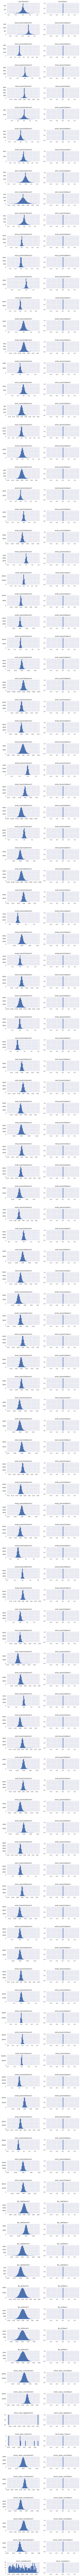

In [0]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)
